### Importing library used

In [1384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1385]:
df = pd.read_csv("dataset/car data.csv")
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [1386]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [1387]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [1388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


Text(0, 0.5, 'Price in thousand dollars ($)')

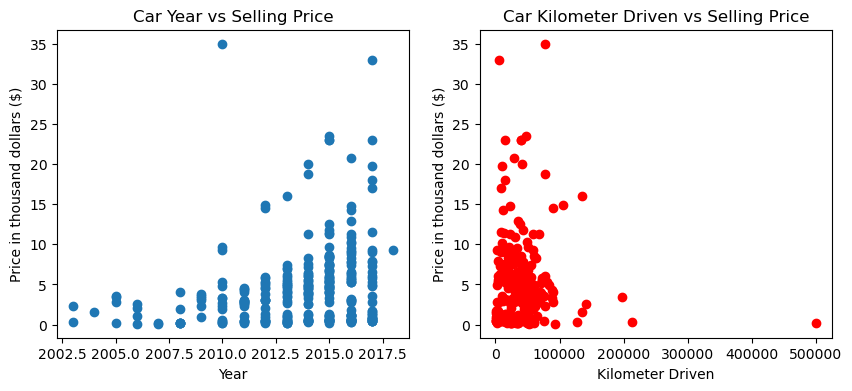

In [1389]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df['Year'],df['Selling_Price'])
plt.title("Car Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Price in thousand dollars ($)")

plt.subplot(1,2,2)
plt.scatter(df['Kms_Driven'],df['Selling_Price'],color='r')
plt.title("Car Kilometer Driven vs Selling Price")
plt.xlabel("Kilometer Driven")
plt.ylabel("Price in thousand dollars ($)")


In [1390]:
# plt.figure(figsize=(10,4))

# plt.subplot(2,2,1)
# plt.bar(df['fuel'],df['selling_price'])
# plt.title("Fuel vs Selling Price")

# plt.subplot(2,2,2)
# plt.bar(df['seller_type'],df['selling_price'])
# plt.title("Seller Type vs Selling Price")

# plt.subplot(2,2,3)
# plt.bar(df['transmission'],df['selling_price'])
# plt.title("Transmission vs Selling Price")

# plt.subplot(2,2,3)
# plt.bar(df['owner'],df['selling_price'])
# plt.title("Owner vs Selling Price")

# plt.tight_layout()
# plt.show()

In [1391]:
X = df.drop(['Selling_Price'],axis=1)
y = df['Selling_Price']

In [1392]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [1393]:
X.describe()

,Year,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.628472,36947.205980,0.043189
std,2.891554,8.644115,38886.883882,0.247915
min,2003.000000,0.320000,500.000000,0.000000
25%,2012.000000,1.200000,15000.000000,0.000000
50%,2014.000000,6.400000,32000.000000,0.000000
75%,2016.000000,9.900000,48767.000000,0.000000
max,2018.000000,92.600000,500000.000000,3.000000


In [1394]:
X = pd.get_dummies(X)

In [1395]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,False,False,True,True,False,False,True
1,2013,9.54,43000,0,False,True,False,True,False,False,True
2,2017,9.85,6900,0,False,False,True,True,False,False,True
3,2011,4.15,5200,0,False,False,True,True,False,False,True
4,2014,6.87,42450,0,False,True,False,True,False,False,True


Feature Scaling dengan Min-Max Scaling

In [1396]:
X['Year'] = (X['Year']-X['Year'].min())/(X['Year'].max()-X['Year'].min())
X['Kms_Driven'] = (X['Kms_Driven']-X['Kms_Driven'].min())/(X['Kms_Driven'].max()-X['Kms_Driven'].min())
X['Present_Price'] = (X['Present_Price']-X['Present_Price'].min())/(X['Present_Price'].max()-X['Present_Price'].min())
y = (y-y.min())/(y.max()-y.min())
pd.concat((X,y),axis=1) # Melihat hasil scaling

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Selling_Price
0,0.733333,0.057109,0.053053,0,False,False,True,True,False,False,True,0.093123
1,0.666667,0.099913,0.085085,0,False,True,False,True,False,False,True,0.133238
2,0.933333,0.103273,0.012813,0,False,False,True,True,False,False,True,0.204871
3,0.533333,0.041504,0.009409,0,False,False,True,True,False,False,True,0.078797
4,0.733333,0.070980,0.083984,0,False,True,False,True,False,False,True,0.128940
...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.866667,0.122237,0.067043,0,False,True,False,True,False,False,True,0.269341
297,0.800000,0.060468,0.119119,0,False,False,True,True,False,False,True,0.111748
298,0.400000,0.115735,0.175043,0,False,False,True,True,False,False,True,0.093123
299,0.933333,0.131990,0.017017,0,False,True,False,True,False,False,True,0.326648


Loss Function (mean_squared_error), hitung Gradient, dan Gradient Descent

In [1397]:
import numpy as np

def mean_squared_error(X, y, w, b):
    # Hitung prediksi
    prediction = np.dot(X, w) + b  # Tidak perlu transpose karena X adalah matriks
    # Hitung error rata-rata kuadrat
    error = np.mean((prediction - y) ** 2) / 2  # Faktor 1/2 untuk gradient descent
    return error

def hitung_gradient(X, y, w, b):
    m = len(y)  # Jumlah data
    # Hitung prediksi
    prediction = np.dot(X, w) + b
    # Error antara prediksi dan target
    errors = prediction - y
    # Gradien terhadap w
    dj_dw = np.dot(X.T, errors) / m
    # Gradien terhadap b
    dj_db = np.mean(errors)
    return dj_dw, dj_db

def gradient_descent(X, y, w, b, epochs=500, alpha=0.01):
    # Make sure w and b are numpy arrays (or scalars)
    w_baru = w
    b_baru = b
    loss_hist = []
    
    for i in range(epochs):
        # Hitung gradien
        dj_dw, dj_db = hitung_gradient(X, y, w_baru, b_baru)
        # Update parameter
        w_baru = w_baru - alpha * dj_dw
        b_baru = b_baru - alpha * dj_db
        # Hitung loss
        loss = mean_squared_error(X, y, w_baru, b_baru)
        loss_hist.append(loss)
        
        if i % 2500 == 0:  # Cetak loss setiap 100 epoch
            print(f"Epoch {i}, Loss: {loss}")
    
    print(f"Final Loss: {loss}")
    return loss_hist, w_baru, b_baru


### Split Data Train dan Test

In [1398]:
X = np.array(X)
y = np.array(y)
X_train = X[:int(len(X)*0.8)]
X_test = X[int(len(X)*0.8):]

y_train = y[:int(len(y)*0.8)]
y_test = y[int(len(y)*0.8):]
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(240, 11) (61, 11)
(240,) (61,)


In [1399]:
w_linreg = np.zeros(X_train.shape[1])
b_linreg = 0
loss_hist,w_linreg,b_linreg = gradient_descent(X_train,y_train,w_linreg,b_linreg,epochs=20000,alpha=0.1)

Epoch 0, Loss: 0.015269612910055066
Epoch 2500, Loss: 0.0016890924475951384
Epoch 5000, Loss: 0.0014779233262227523
Epoch 7500, Loss: 0.001464185577587642
Epoch 10000, Loss: 0.0014632912918686874
Epoch 12500, Loss: 0.0014632330723991025
Epoch 15000, Loss: 0.0014632292819383135
Epoch 17500, Loss: 0.0014632290351245
Final Loss: 0.001463229019051161


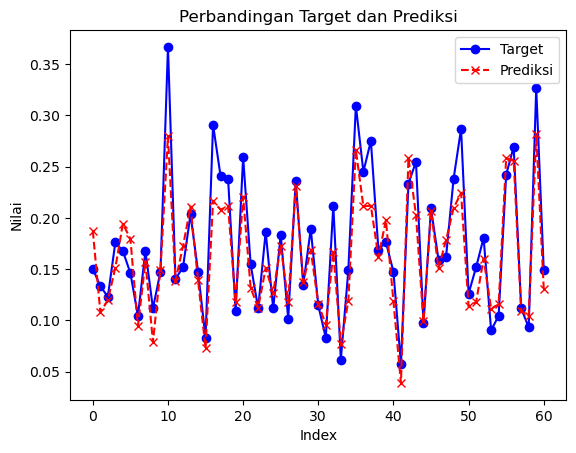

In [1400]:
prediksi = np.dot(w_linreg, X_test.T) + b_linreg

target = y_test

residuals = target - prediksi  # Selisih antara target dan prediksi

plt.plot(target, label='Target', marker='o', linestyle='-', color='b')
plt.plot(prediksi, label='Prediksi', marker='x', linestyle='--', color='r')
plt.xlabel('Index')
plt.ylabel('Nilai')
plt.title('Perbandingan Target dan Prediksi')
plt.legend()
plt.show()

### Menggunakan Polynomial Regression

In [1401]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4,include_bias=False)
X_train_polynomial = poly.fit_transform(X_train)
X_test_polynomial = poly.fit_transform(X_test)
X_train_polynomial.shape,X_test_polynomial.shape

((240, 1364), (61, 1364))

In [1402]:
w_poly_reg = np.zeros(X_train_polynomial.shape[1])
b_poly_reg = 0
loss_hist,w_poly_reg,b_poly_reg = gradient_descent(X_train_polynomial,y_train,w_poly_reg,b_poly_reg,epochs=20000,alpha=0.01)

Epoch 0, Loss: 0.016158098587136478
Epoch 2500, Loss: 0.0006987105466206198
Epoch 5000, Loss: 0.0005521741748579462
Epoch 7500, Loss: 0.00048135013451876886
Epoch 10000, Loss: 0.00043935300606369487
Epoch 12500, Loss: 0.00041095956170404875
Epoch 15000, Loss: 0.0003896762492885737
Epoch 17500, Loss: 0.0003725311422064231
Final Loss: 0.00035807729080113723


In [1403]:
y_test

array([0.1504298 , 0.13323782, 0.12320917, 0.17621777, 0.16762178,
       0.14613181, 0.10458453, 0.16762178, 0.11174785, 0.14756447,
       0.36676218, 0.14040115, 0.15186246, 0.2034384 , 0.14756447,
       0.08309456, 0.29083095, 0.24068768, 0.23782235, 0.10888252,
       0.25931232, 0.15472779, 0.11174785, 0.18624642, 0.11174785,
       0.18338109, 0.1017192 , 0.23638968, 0.13467049, 0.18911175,
       0.11461318, 0.08309456, 0.21203438, 0.06160458, 0.14899713,
       0.30945559, 0.24498567, 0.27507163, 0.16905444, 0.17621777,
       0.14756447, 0.05730659, 0.23352436, 0.25472779, 0.0974212 ,
       0.20916905, 0.15902579, 0.16189112, 0.23782235, 0.28681948,
       0.1260745 , 0.15186246, 0.18051576, 0.09025788, 0.10458453,
       0.24212034, 0.26934097, 0.11174785, 0.09312321, 0.32664756,
       0.14899713])

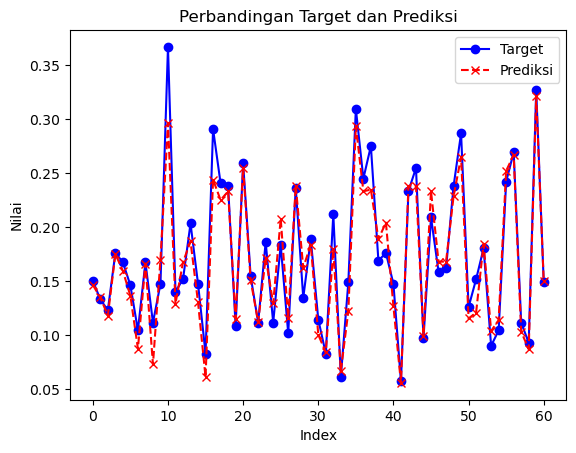

In [1404]:
prediksi = np.dot(w_poly_reg, X_test_polynomial.T) + b_poly_reg

# Target sebenarnya (y_test) sudah dalam skala asli
target = y_test

residuals = target - prediksi  # Selisih antara target dan prediksi

plt.plot(target, label='Target', marker='o', linestyle='-', color='b')
plt.plot(prediksi, label='Prediksi', marker='x', linestyle='--', color='r')
plt.xlabel('Index')
plt.ylabel('Nilai')
plt.title('Perbandingan Target dan Prediksi')
plt.legend()
plt.show()

In [1405]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [1406]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1407]:
y_pred = model.predict(X_test)

# Evaluasi model menggunakan MSE dan R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.000840287620647564
R-squared: 0.8220540105304044


In [1408]:
y_pred[10],y_test[10]

(0.27969030497638825, 0.36676217765042984)